This file is to test for distributions and how we can plot stuff.

Import all necessary libraries.

In [1]:
import random # Used for random generation of points
import matplotlib
import matplotlib.pyplot as plt # Used for visualization of distributions and classifiction
import seaborn as sns
# import numpy as np 
import pandas as pd # Used for simplification of plotting points
import math # Used for various math utilities

Random distribution of points in a 1x1 box.

x         y color
0   0.021075  0.558844   red
0   0.217479  0.057633   red
0   0.833368  0.739854   red
0   0.906221  0.731826   red
0   0.238983  0.815910   red
..       ...       ...   ...
0   0.802034  0.891971   red
0   0.111937  0.591900   red
0   0.648209  0.433157   red
0   0.592706  0.462509   red
0   0.222126  0.314576   red

[1000 rows x 3 columns]

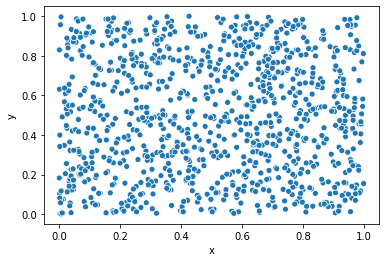

In [2]:
def generateSingleSquareRandomDistribution(number_of_points, color="red"):
    df = pd.DataFrame({'x': [], 'y': [], 'color': []})

    for _ in range(number_of_points):
        df = df.append(pd.DataFrame({'x': [random.random()], 'y': [random.random()], 'color': [color]}))

    sns.scatterplot(x="x", y="y", data=df, hue="color", legend=False)

    return df

generateSingleSquareRandomDistribution(1000)

2 random distributions of points in a 1x1 box. 

x         y color
0   0.289628  0.550237   red
0   0.752293  0.004842  blue
0   0.227779  0.093792   red
0   0.851245  0.901461  blue
0   0.938194  0.903379   red
..       ...       ...   ...
0   0.679489  0.098816  blue
0   0.300924  0.806552   red
0   0.512182  0.335668  blue
0   0.245741  0.654538   red
0   0.687856  0.728335  blue

[2000 rows x 3 columns]

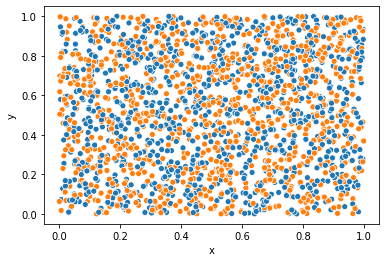

In [3]:
def generateDoubleSquareRandomDistribution(number_of_points, colors=["red", "blue"]):
    df = pd.DataFrame({'x': [], 'y': [], 'color': []})

    for _ in range(number_of_points):
        df = df.append(pd.DataFrame({'x': [random.random()], 'y': [random.random()], 'color': [colors[0]]}))
        df = df.append(pd.DataFrame({'x': [random.random()], 'y': [random.random()], 'color': [colors[1]]}))
    
    # df.plot.scatter(x="x", y="y", c="color")
    sns.scatterplot(x="x", y="y", data=df, hue="color", legend=False)

    return df

generateDoubleSquareRandomDistribution(1000)

Random distribution of points in a circle of radius 1.

x         y color
0   0.366891  0.580346   red
0   0.452897  0.691028   red
0   0.447041  0.556128   red
0   0.384267  0.426635   red
0   0.359935  0.619421   red
..       ...       ...   ...
0   0.649579  0.447448   red
0   0.467005  0.443754   red
0   0.511345  0.690489   red
0   0.421297  0.426096   red
0   0.484693  0.555793   red

[1000 rows x 3 columns]

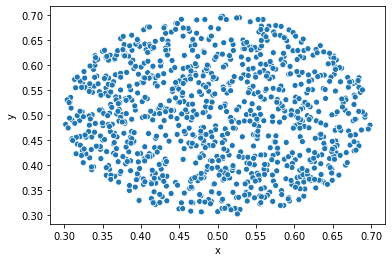

In [5]:
def generateSingleCircleRandomDistribution(number_of_points, radius, center_x, center_y, color="red"):
    df = pd.DataFrame({'x': [], 'y': [], 'color': []})

    for _ in range(number_of_points):
        alpha = 2 * math.pi * random.random()
        r = radius * math.sqrt(random.random())
        x = r * math.cos(alpha) + center_x
        y = r * math.sin(alpha) + center_y
        df = df.append(pd.DataFrame({'x': [x], 'y': [y], 'color': [color]}))
    
    sns.scatterplot(x="x", y="y", data=df, hue="color", legend=False)

    return df

generateSingleCircleRandomDistribution(1000, 0.2, 0.5, 0.5)

Distribution of points in 1 circle and 1 box, overlaid on top of each other.

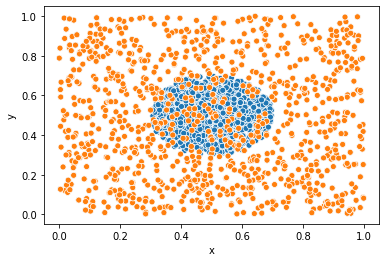

In [6]:
def generateSingleCircleAndSingleSquareDistribution(number_of_points, radius, center_x, center_y):
    circle_points = generateSingleCircleRandomDistribution(number_of_points, radius, center_x, center_y, "green")
    square_points = generateSingleSquareRandomDistribution(number_of_points, "red")

    df = circle_points.append(square_points)

    sns.scatterplot(x="x", y="y", data=df, hue="color", legend=False)

    return

generateSingleCircleAndSingleSquareDistribution(1000, 0.2, 0.5, 0.5)

Distribution of points in multiple circles and 1 box, overlaid on top of each other.

({0: [0.05289389001326661, 0.2434578151920322, 0.30445325248422217]},
            x         y    color
 0   0.000000  0.288348  #430be0
 0   0.115355  0.218838  #430be0
 0   0.007300  0.281766  #430be0
 0   0.022883  0.303249  #430be0
 0   0.135301  0.230701  #430be0
 ..       ...       ...      ...
 0   0.280168  0.374256      red
 0   0.052422  0.142736      red
 0   0.565982  0.491653      red
 0   0.661560  0.941552      red
 0   0.337771  0.627287      red
 
 [1250 rows x 3 columns])

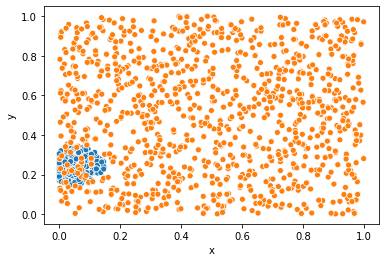

In [7]:
def generateMultipleCircleAndSquareDistribution(number_of_clusters=random.randint(2, 4), number_of_points = 1000):
    df = pd.DataFrame({'x': [], 'y': [], 'color': []})

    cluster_map = {}
    for cluster_num in range(number_of_clusters):
        cluster_map[cluster_num] =  [random.uniform(0, 0.5), random.uniform(0, 0.5), random.uniform(0.1, 0.5)]  

    for cluster in cluster_map.keys():
        cluster_x, cluster_y, cluster_r = cluster_map[cluster]
        color = "#" + "%06x" % random.randint(0, 0xFFFFFF)
        new_cluster_df = pd.DataFrame({'x': [], 'y': [], 'color': []})

        for _ in range(int(number_of_points * 0.25)):
            alpha = 2 * math.pi * random.random()
            r = cluster_r * math.sqrt(random.uniform(0, 0.1))
            x = r * math.cos(alpha) + cluster_x
            y = r * math.sin(alpha) + cluster_y
            bound_x = max(0, min(1, x))
            bound_y = max(0, min(1, y))
            new_cluster_df = new_cluster_df.append(pd.DataFrame({'x': bound_x, 'y': [bound_y], 'color': [color]}))
        df = df.append(new_cluster_df)

    red_point_df = generateSingleSquareRandomDistribution(number_of_points, "red")

    df = df.append(red_point_df)

    sns.scatterplot(x="x", y="y", data=df, hue="color", legend=False)

    return cluster_map, df

generateMultipleCircleAndSquareDistribution(1, 1000)

115 1 61 5


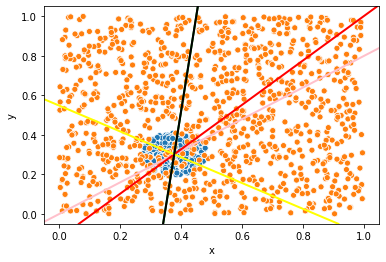

In [11]:
def slopeCalc(anchor, center, xy_split):
    slope = 0
    if xy_split:
        denom = (center[0] - anchor[0])
        if denom != 0:
            slope = (center[1] - anchor[1]) / denom
    else:
        denom = (center[1] - anchor[1])
        if center[1] != 1:
            slope = (center[0] - anchor[0]) / denom
    return slope

def totalPointCalc(slope, anchor, df, direction, total):
    if direction == 1:
        if slope == 0:
            for idx, point in df.iterrows():
                if point['y'] < center[1]:
                    total += 1
        else:
            for idx, point in df.iterrows():
                if point['y'] < slope * point['x'] + anchor[1]:
                    total += 1
    elif direction == 2:
        if slope == 0:
            for idx, point in df.iterrows():
                if point['x'] < center[0]:
                    total += 1
        else:
            for idx, point in df.iterrows():
                if point['x'] < slope * point['y'] + anchor[0]:
                    total += 1
    elif direction == 3:
        if slope == 0:
            for idx, point in df.iterrows():
                if point['y'] < center[1]:
                    total += 1
        else:
            for idx, point in df.iterrows():
                if point['y'] < -slope * point['x'] + anchor[1]:
                    total += 1
    else:
        if slope == 0:
            for idx, point in df.iterrows():
                if point['x'] < center[0]:
                    total += 1
        else:
            for idx, point in df.iterrows():
                if point['x'] < slope * point['y'] + anchor[0]:
                    total += 1
    return total

def anchor_left(anchor, center, df, split_increment):
    half_points = len(df) // 2
    min_diff = float("inf")
    best_anchor = anchor.copy()

    while anchor[1] < 1:
        total = 0
        slope = slopeCalc(anchor, center, 1)
        total = totalPointCalc(slope, anchor, df, 1, 0)

        abs_diff = abs(total - half_points)
        if abs_diff < min_diff:
            min_diff = abs_diff
            best_anchor = anchor.copy()

        anchor[1] += split_increment

    return min_diff, best_anchor

def anchor_top(anchor, center, df, split_increment):
    half_points = len(df) // 2
    min_diff = float("inf")
    best_anchor = anchor.copy()

    while anchor[0] < 1:
        total = 0
        slope = slopeCalc(anchor, center, 0)
        total = totalPointCalc(slope, anchor, df, 2, 0)

        abs_diff = abs(total - half_points)
        if abs_diff < min_diff:
            min_diff = abs_diff
            best_anchor = anchor.copy()

        anchor[0] += split_increment

    return min_diff, best_anchor

def anchor_right(anchor, center, df, split_increment):
    half_points = len(df) // 2
    min_diff = float("inf")
    best_anchor = anchor.copy()

    while anchor[1] > 0:
        total = 0
        slope = slopeCalc(anchor, center, 1)
        total = totalPointCalc(slope, anchor, df, 3, 0)

        abs_diff = abs(total - half_points)
        if abs_diff < min_diff:
            min_diff = abs_diff
            best_anchor = anchor.copy()

        anchor[1] -= split_increment

    return min_diff, best_anchor

def anchor_bottom(anchor, center, df, split_increment):
    half_points = len(df) // 2
    min_diff = float("inf")
    best_anchor = anchor.copy()

    while anchor[0] > 0:
        total = 0
        slope = slopeCalc(anchor, center, 1)
        total = totalPointCalc(slope, anchor, df, 4, 0)

        abs_diff = abs(total - half_points)
        if abs_diff < min_diff:
            min_diff = abs_diff
            best_anchor = anchor.copy()

        anchor[0] -= split_increment

    return min_diff, best_anchor

def splitSingleCircleAndSquareDistribution(split_increment=0.01):
    cluster_map, points_df = generateMultipleCircleAndSquareDistribution(1, 1000)
    red_points_df = points_df.loc[points_df['color'] == 'red']

    center = tuple(cluster_map[0][:2])

    left_anchor = [0, 0]
    left_diff, left_anchor = anchor_left(left_anchor, center, red_points_df, split_increment)

    top_anchor = [0, 1]
    top_diff, top_anchor = anchor_top(top_anchor, center, red_points_df, split_increment)

    right_anchor = [1, 1]
    right_diff, right_anchor = anchor_right(right_anchor, center, red_points_df, split_increment)

    bottom_anchor = [1, 0]
    bottom_diff, bottom_anchor = anchor_bottom(bottom_anchor, center, red_points_df, split_increment)

    # print(left_diff, top_diff, right_diff, bottom_diff)

    sns.scatterplot(x="x", y="y", data=points_df, hue="color", legend=False)
    min_diff = min(left_diff, top_diff, right_diff, bottom_diff)
    # plt.axline(left_anchor, center, linewidth=2, color="pink")
    # plt.axline(top_anchor, center, linewidth=2, color="green")
    # plt.axline(right_anchor, center, linewidth=2, color="red")
    # plt.axline(bottom_anchor, center, linewidth=2, color="yellow")
    if min_diff == left_diff:
        plt.axline(left_anchor, center, linewidth=2, color="black")
    elif min_diff == top_diff:
        plt.axline(top_anchor, center, linewidth=2, color="black")
    elif min_diff == right_diff:
        plt.axline(right_anchor, center, linewidth=2, color="black")
    else:
        plt.axline(bottom_anchor, center, linewidth=2, color="black")

    return 

splitSingleCircleAndSquareDistribution(0.01)

138 4 131 5
7 1 0 3


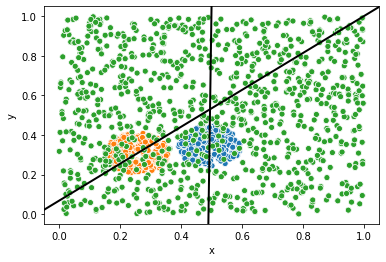

In [15]:
def splitMultipleCircleAndSquareDistribution(number_of_clusters, number_of_points=1000, split_increment=0.01):
    cluster_map, points_df = generateMultipleCircleAndSquareDistribution(number_of_clusters, number_of_points)

    red_points_df = points_df.loc[points_df['color'] == 'red']

    centers = []
    for cluster in cluster_map.keys():
        centers.append(cluster_map[cluster][:2])

    for center in centers:
        center = tuple(center)

        left_anchor = [0, 0]
        left_diff, left_anchor = anchor_left(left_anchor, center, red_points_df, split_increment)

        top_anchor = [0, 1]
        top_diff, top_anchor = anchor_top(top_anchor, center, red_points_df, split_increment)

        right_anchor = [1, 1]
        right_diff, right_anchor = anchor_right(right_anchor, center, red_points_df, split_increment)

        bottom_anchor = [1, 0]
        bottom_diff, bottom_anchor = anchor_bottom(bottom_anchor, center, red_points_df, split_increment)
            
        print(left_diff, top_diff, right_diff, bottom_diff)
        
        sns.scatterplot(x="x", y="y", data=points_df, hue="color", legend=False)
        min_diff = min(left_diff, top_diff, right_diff, bottom_diff)
        # plt.axline(left_anchor, center, linewidth=2, color="pink")
        # plt.axline(top_anchor, center, linewidth=2, color="green")
        # plt.axline(right_anchor, center, linewidth=2, color="red")
        # plt.axline(bottom_anchor, center, linewidth=2, color="yellow")
        if min_diff == left_diff:
            plt.axline(left_anchor, center, linewidth=2, color="black")
        elif min_diff == top_diff:
            plt.axline(top_anchor, center, linewidth=2, color="black")
        elif min_diff == right_diff:
            plt.axline(right_anchor, center, linewidth=2, color="black")
        else:
            plt.axline(bottom_anchor, center, linewidth=2, color="black")

    return

splitMultipleCircleAndSquareDistribution(2, 1000, 0.01)

In [ ]:
def visualizeSSCMT():

def redSplits(center, anchor, red_points, x_split, y_split, splits):
    if splits == 0:
        return
    else:
        number_of_points = len(red_points)
        half_number_of_points = number_of_points // 2
        if x_split:
            top_red_points_df = pd.DataFrame({'x': [], 'y': [], 'color': []})
            bot_red_points_df = pd.DataFrame({'x': [], 'y': [], 'color': []})
            for point in red_points.iterrows():
                if point['y'] < slope * point['x'] + anchor[1]:
                    top_red_points_df.append(point)
                else:
                    bot_red_points_df.append(point)

            top_anchor = anchor

            while abs_diff != 0 and anchor[1] < 1:
                total = 0
                slope = 0
                if center[0] != 0:
                    slope = (center[1] - top_anchor[1]) / (center[0] - top_anchor[0])

                if slope == 0:
                    for idx, point in top_red_points_df.iterrows():
                        if point['y'] < center[1]:
                            total += 1
                else:
                    for idx, point in top_red_points_df.iterrows():
                        if point['y'] < slope * point['x'] + top_anchor[1]:
                            total += 1

                if abs(total - half_number_of_points) < abs_diff:
                    abs_diff = abs(total - half_number_of_points)
                    best_anchor = anchor
                    x_split, y_split = 1, 0

                anchor = (0, anchor[1] + 0.01)

            while abs_diff != 0 and top_anchor[1] < 1:
                total = 0
                slope = 0
                if center[0] != 0:
                    slope = (center[0] - top_anchor[0]) / (center[1] - top_anchor[1])

                if slope == 0:
                    for idx, point in top_red_points_df.iterrows():
                        if point['y'] < center[1]:
                            total += 1
                else:
                    for idx, point in top_red_points_df.iterrows():
                        if point['x'] < -slope * point['y'] + top_anchor[0]:
                            total += 1

                if abs(total - 500) < abs_diff:
                    abs_diff = abs(total - 500)
                    best_anchor = anchor
                    x_split, y_split = 0, 1

                anchor = (anchor[0] + 0.01, 1)

            while abs_diff != 0 and top_anchor[0] > anchor[0]:
                total = 0
                slope = 0
                if center[0] != 0:
                    slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

                if slope == 0:
                    for idx, point in red_points_df.iterrows():
                        if point['y'] < center[1]:
                            total += 1
                else:
                    for idx, point in red_points_df.iterrows():
                        if point['y'] < -slope * point['x'] + anchor[1]:
                            total += 1

                if abs(total - 500) < abs_diff:
                    abs_diff = abs(total - 500)
                    best_anchor = anchor
                    x_split, y_split = 1, 0

                anchor = (1, anchor[1] - 0.01)

        else:
            for point in red_points.iterrows():
                if point['x'] < -slope * point['y'] + anchor[0]:
                    top_red_points_df.append(point)
                else:
                    bot_red_points_df.append(point)

    


def splitSingleCircleMultipleTimes():
    cluster_map, points_df = generateMultipleCircleAndSquareDistribution(1, 2000)
    number_of_points = len(points_df)

    red_points_df = points_df.loc[points_df['color'] == 'red']
    number_of_red_points = len(red_points_df)

    centers = []
    for cluster in cluster_map.keys():
        centers.append(cluster_map[cluster][:2])

    for center in centers:
        center = tuple(center)
        anchor = (0, 0)

        abs_diff = float("inf")
        best_anchor = (0, 0)
        x_split, y_split = 0, 0
        while abs_diff != 0 and anchor[1] < 1:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[1] - anchor[1]) / (center[0] - anchor[0])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < slope * point['x'] + anchor[1]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor
                x_split, y_split = 1, 0

            anchor = (0, anchor[1] + 0.01)

        while abs_diff != 0 and anchor[0] < 1:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['x'] < -slope * point['y'] + anchor[0]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor
                x_split, y_split = 0, 1

            anchor = (anchor[0] + 0.01, 1)

        while abs_diff != 0 and anchor[1] > 0:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < -slope * point['x'] + anchor[1]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor
                x_split, y_split = 1, 0

            anchor = (1, anchor[1] - 0.01)

        while abs_diff != 0 and anchor[0] > 0:
            total = 0
            slope = 0
            if center[0] != 0:
                slope = (center[0] - anchor[0]) / (center[1] - anchor[1])

            if slope == 0:
                for idx, point in red_points_df.iterrows():
                    if point['y'] < center[1]:
                        total += 1
            else:
                for idx, point in red_points_df.iterrows():
                    if point['x'] < slope * point['y'] + anchor[0]:
                        total += 1

            if abs(total - 500) < abs_diff:
                abs_diff = abs(total - 500)
                best_anchor = anchor
                x_split, y_split = 1, 1

            anchor = (anchor[0] - 0.01, 0)

        redSplits(center, best_anchor, red_points_df, x_split, y_split, 1)
            
        visualizeSSCSD(cluster_map, points_df, center, best_anchor)

    return

splitMultipleCircleAndSquareDistribution()